# VTK 
El Kit de herramientas de visualización (VTK) es un sistema de software libre, libremente disponible para la realización de gráficos 3D por computadora, procesamiento de imagen y visualización. VTK consiste en una biblioteca de clases de C++ y varias capas de interfaz interpretadas como Tcl/Tk, Java, y Python

Fuentes:
[Python Examples](https://lorensen.github.io/VTKExamples/site/Python/)
[Vtk Text Book](https://raw.githubusercontent.com/lorensen/VTKExamples/master/src/VTKBookLaTeX/VTKTextBook.pdf)
,[Vtk User Guide](https://www.kitware.com/products/books/VTKUsersGuide.pdf)


Para instalar puede correr el siguiente comanto en su terminal
    pip install vtk   --user
Alternativamente puede instalarlo desde Jupyter como se muestra a continuación:

In [4]:
!pip install vtk==8.1.2    #for vtk-9.0.1 use: !pip install vtk

     |████████████████████████████████| 48.9 MB 579 kB/s eta 0:00:01
  Attempting uninstall: vtk
    Found existing installation: vtk 9.0.1
    Uninstalling vtk-9.0.1:
      Successfully uninstalled vtk-9.0.1



Verificamos que podemos importar la librería correctamente.  (Si lo instaló desde jupyter debe cerrarlo y volver a a abrirlo antes de importar vtk por primera vez)

In [1]:
import vtk
print(vtk.vtkVersion.GetVTKSourceVersion())

vtk version 8.1.2


## Proceso típico de visualización:

**SOURCES/READER**  -->  **FILTERS** --> **MAPPER** --> **ACTORS** --> **RENDERER** --> **RENDER WINDOW** --> **INTERACTORS**


*  **SOURCES**: fuentes de datos. utiliza funciones para construir objetos geométricos simples:
* **READER**, lee datos desde un archivo

* **FILTERS**: toma una entrada de datos y devuelve diversas modificaciones posibles
* **MAPPER**, realiza un mapeo desde los datos a primitivas de gráficos (puntos, líneas, triángulos) que pueden ser mostrados por el Renderer
  

* **ACTORS**, representa un object y sus propiedades en una escena de renderización

* **RENDERER** controla el proceso de renderización  (convertir las primitivas de un gráfico 3D en una imagen visualizable en una pantalla) para actores y escenas, por debajo utiliza OpenGL

* **RENDER WINDOW**, crea una ventana en la que renderizar el dibujo

* **INTERACTORS**: provee una ventana multiplataforma para interactuar via mause y teclado


## Entrada
### Cargar un archivo PolyData .vtk y visualización interactiva

[implementación para multiples formatos de entrada(algunas instancias deprecadas)](https://lorensen.github.io/VTKExamples/site/Python/Snippets/ReadPolyData/)

In [1]:
# CARGAR Y VISUALIZAR UN ARCHIVO

import vtk

def leerArchivo(nombre_archivo):
    
    # SOURCE/READER 
    #reader = vtk.vtkPLYReader()                    # .ply
    #reader = vtk.vtkXMLPolyDataReader()           # .vtp
    #reader = vtk.vtkOBJReader()                    # .obj
    #reader = vtk.vtkSTLReader()                    # .stl
    #reader =vtk.vtkBYUReader()                     # .g
    reader = vtk.vtkPolyDataReader()                # .vtk   # crea el objeto reader

    reader.SetFileName(nombre_archivo)              # lee un archivo de entrada 
    reader.Update()                                 
    data = reader.GetOutput()

    # MAPPER
    mapeo = vtk.vtkPolyDataMapper()                 # crea el objeto mapeo
    mapeo.SetInputData(data)                        # conecta mapeo con data

    # ACTOR 
    actor = vtk.vtkActor()                          # crea el objeto actor
    actor.SetMapper(mapeo)                          # conectar  mapper con  actor
    
    # RENDERER
    renderer = vtk.vtkRenderer()                    # crea un objeto renderer
    renderer.AddActor(actor)                        # conecta renderer con actor

    # RENDER-WINDOW
    render_window = vtk.vtkRenderWindow()           # crea el objeto render_window
    render_window.AddRenderer(renderer)             # conecta render_window con renderer

    # INTERACTOR
    interactor = vtk.vtkRenderWindowInteractor()    # crea el objeto interactor
    interactor.SetRenderWindow(render_window)       # conecta el interactor render_window

    interactor.Initialize()                         # inicializa interactor
    render_window.Render()                          # renderiza en  la ventana interactiva
    interactor.Start()                              # inicia el loop para interactor

leerArchivo('tubes.vtk')

In [2]:
# VISUALIZACIÓN CON PARÁMETROS ADICIONALES

import vtk

def leerArchivo(nombre_archivo):
    
    # SOURCE/READER 
    reader = vtk.vtkPolyDataReader()                
    reader.SetFileName(nombre_archivo)              
    reader.Update()                          
    poly_data = reader.GetOutput()

    # MAPPER
    mapeo = vtk.vtkPolyDataMapper()            
    mapeo.SetInputData(poly_data)

    # ACTOR 
    actor = vtk.vtkActor()                         
    actor.SetMapper(mapeo)                         
    actor.GetProperty().SetColor(1.0, 0.0, 0.0)                   # cambia el color de actor
    actor.RotateX(30.0)                                           # rotación en los ejes de actor
    actor.RotateY(45.0)

    # RENDERER
    renderer = vtk.vtkRenderer()
    colors = vtk.vtkNamedColors()                                 # color por nombres  ver: https://gitlab.kitware.com/vtk/vtk/blob/bc8b0a565766ab3768df6a4f5f07992bdae4afd8/Common/Color/vtkNamedColors.cxx
    renderer.SetBackground(colors.GetColor3d("Green"))            #cambia el color del fondo
    renderer.AddActor(actor)                         

    # RENDER-WINDOW
    render_window = vtk.vtkRenderWindow()           
    render_window.SetWindowName("Ejemplo -- VTK")                 # Título de la ventana
    render_window.SetSize(600, 600)                               # tamaño de la ventana
    render_window.AddRenderer(renderer)            

    # INTERACTOR
    interactor = vtk.vtkRenderWindowInteractor()    
    interactor.SetRenderWindow(render_window)       

    interactor.Initialize() 
    renderer.ResetCamera()                                        # resetear cámara
    renderer.GetActiveCamera().Zoom(2.5)                          # hacer un zoom
    render_window.Render()                         
    interactor.Start()                             

leerArchivo('tubes.vtk')

In [1]:
#capturar y guardar imagen

import vtk

def capturaImagen(nombre_archivo): 
    
    # SOURCE/READER 
    reader = vtk.vtkPolyDataReader()                
    reader.SetFileName(nombre_archivo)              
    reader.Update()                          
    poly_data = reader.GetOutput()

    # MAPPER
    mapeo = vtk.vtkPolyDataMapper()            
    mapeo.SetInputData(poly_data)

    # ACTOR 
    actor = vtk.vtkActor()                         
    actor.SetMapper(mapeo)                         
    actor.GetProperty().SetColor(1.0, 0.0, 0.0)                   
    actor.RotateX(30.0)                                           
    actor.RotateY(45.0)

    # RENDERER
    renderer = vtk.vtkRenderer()
    colors = vtk.vtkNamedColors()                                
    renderer.SetBackground(colors.GetColor3d("Green"))           
    renderer.AddActor(actor)                         

    # RENDER-WINDOW
    render_window = vtk.vtkRenderWindow()           
    render_window.SetWindowName("Ejemplo de renderización VTK")   
    render_window.SetSize(600, 600)                               
    render_window.AddRenderer(renderer)            

    # INTERACTOR
    interactor = vtk.vtkRenderWindowInteractor()    
    interactor.SetRenderWindow(render_window)       

    interactor.Initialize() 
    renderer.ResetCamera()                                        
    renderer.GetActiveCamera().Zoom(2.5)                          
    render_window.Render() 

    #######################################################################
    ## Guardar imagen
    
    #writer = vtk.vtkBMPWriter()        # .bmp
    #writer = vtk.vtkJPEGWriter()       # .jpg
    #writer = vtk.vtkPNMWriter()        # .pnm
    #writer = vtk.vtkPostScriptWriter() # .ps
    #writer = vtk.vtkTIFFWriter()       # .tiff
    writer = vtk.vtkPNGWriter()        # .png       #crea el objeto writer
    
    # FILTER
    windowto_image_filter = vtk.vtkWindowToImageFilter()    #crea el objeto windowto_image_filter
    windowto_image_filter.SetInput(render_window)    #renwin=rendered window
    windowto_image_filter.SetScale(1)                # calidad de imagen
    windowto_image_filter.SetInputBufferTypeToRGB()
    windowto_image_filter.ReadFrontBufferOff()      # Read from the front buffer.
    windowto_image_filter.Update()
    

    writer.SetFileName('tubes.png')                 #nombre del archivo de salida
    writer.SetInputConnection(windowto_image_filter.GetOutputPort())
    writer.Write()

    #interactor.Start()  
capturaImagen('tubes.vtk')

Cargar la imagen para visualizar dentro del Notebook:

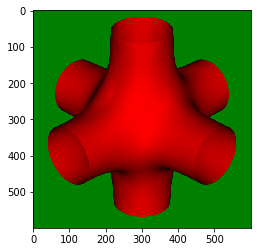

In [1]:
import numpy as np 
import imageio
import matplotlib.pyplot as plt
%matplotlib inline
from PIL import Image
imagen = imageio.imread('tubes.png')
plt.imshow(imagen)
plt.show()

In [4]:
#capturar imagen, modificar escena y captura nueva imagen

import vtk

def capturaImagen(nombre_archivo): 
    
    # SOURCE/READER 
    reader = vtk.vtkPolyDataReader()                
    reader.SetFileName(nombre_archivo)              
    reader.Update()                          
    poly_data = reader.GetOutput()

    # MAPPER
    mapeo = vtk.vtkPolyDataMapper()            
    mapeo.SetInputData(poly_data)

    # ACTOR 
    actor = vtk.vtkActor()                         
    actor.SetMapper(mapeo)                         
    actor.GetProperty().SetColor(1.0, 0.0, 0.0)                   
    actor.RotateX(30.0)                                           
    actor.RotateY(45.0)

    # RENDERER
    renderer = vtk.vtkRenderer()
    colors = vtk.vtkNamedColors()                                
    renderer.SetBackground(colors.GetColor3d("Green"))           
    renderer.AddActor(actor)                         

    # RENDER-WINDOW
    render_window = vtk.vtkRenderWindow()           
    render_window.SetWindowName("Ejemplo de renderización VTK")   
    render_window.SetSize(600, 600)                               
    render_window.AddRenderer(renderer)            

    # INTERACTOR
    interactor = vtk.vtkRenderWindowInteractor()    
    interactor.SetRenderWindow(render_window)       

    interactor.Initialize() 
    renderer.ResetCamera()                                        
    renderer.GetActiveCamera().Zoom(2.5)                          
    render_window.Render() 
    
    
    # FILTER
    windowto_image_filter = vtk.vtkWindowToImageFilter()   
    windowto_image_filter.SetInput(render_window)    
    windowto_image_filter.SetScale(1)   
    windowto_image_filter.SetInputBufferTypeToRGB()
    windowto_image_filter.ReadFrontBufferOff()      
    windowto_image_filter.Update()
    
    
    # Objeto para Guardar imagen
    writer = vtk.vtkPNGWriter()
    writer.SetFileName('tubes1.png')                 
    writer.SetInputConnection(windowto_image_filter.GetOutputPort())
    writer.Write()
    
    #######################################################################                               
    actor.RotateY(-45.0)                                     # modifico, en este caso rotando en Z al actor
    render_window.Render()                                  # vuelvo a renderizar

    windowto_image_filter = vtk.vtkWindowToImageFilter()    # actualizo los datos de vtkWindowToImageFilter
    windowto_image_filter.SetInput(render_window)   
    windowto_image_filter.SetScale(1)                
    windowto_image_filter.SetInputBufferTypeToRGB()
    windowto_image_filter.ReadFrontBufferOff()      
    windowto_image_filter.Update()
    
    writer.SetFileName('tubes2.png')                         #guardo una nueva imagen
    writer.SetInputConnection(windowto_image_filter.GetOutputPort())
    writer.Write()


capturaImagen('tubes.vtk')

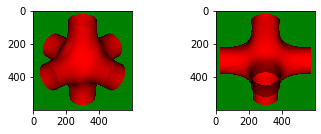

In [5]:
import numpy as np 
import imageio
import matplotlib.pyplot as plt
%matplotlib inline
from PIL import Image

plt.subplot(2, 2, 1)
imagen1 = imageio.imread('tubes1.png')
plt.imshow(imagen1)

plt.subplot(2, 2, 2)
imagen2 = imageio.imread('tubes2.png')
plt.imshow(imagen2)

plt.show()

In [1]:
# VISUALIZACIÓN CON PARÁMETROS ADICIONALES

import vtk

def leerArchivo(nombre_archivo):
    
    # SOURCE/READER 
    reader = vtk.vtkPolyDataReader()                
    reader.SetFileName(nombre_archivo)              
    reader.Update()                          
    poly_data = reader.GetOutput()

    # MAPPER
    mapeo = vtk.vtkPolyDataMapper()            
    mapeo.SetInputData(poly_data)

    # ACTOR 
    actor = vtk.vtkActor()                         
    actor.SetMapper(mapeo)                         
    actor.GetProperty().SetColor(1.0, 0.0, 0.0)                   # cambia el color de actor
    actor.RotateX(30.0)                                           # rotación en los ejes de actor
    actor.RotateY(45.0)

    # RENDERER
    renderer = vtk.vtkRenderer()
    colors = vtk.vtkNamedColors()                                 # color por nombres  ver: https://gitlab.kitware.com/vtk/vtk/blob/bc8b0a565766ab3768df6a4f5f07992bdae4afd8/Common/Color/vtkNamedColors.cxx
    renderer.SetBackground(colors.GetColor3d("Green"))            #cambia el color del fondo
    renderer.AddActor(actor)                         

    # RENDER-WINDOW
    render_window = vtk.vtkRenderWindow()           
    render_window.SetWindowName("Ejemplo -- VTK")                 # Título de la ventana
    render_window.SetSize(600, 600)                               # tamaño de la ventana
    render_window.AddRenderer(renderer)            

    # INTERACTOR
    interactor = vtk.vtkRenderWindowInteractor()    
    interactor.SetRenderWindow(render_window)       

    interactor.Initialize() 
    renderer.ResetCamera()                                        # resetear cámara
    renderer.GetActiveCamera().Zoom(2.5)                          # hacer un zoom
    render_window.Render()                         
    interactor.Start()                             

leerArchivo('tubes.vtk')

In [3]:
# VISUALIZACIÓN CON PARÁMETROS ADICIONALES + filtro vtkFeatureEdges

import vtk

def leerArchivo(nombre_archivo):
    
    # SOURCE/READER 
    reader = vtk.vtkPolyDataReader()                
    reader.SetFileName(nombre_archivo)              
    reader.Update()                          
    poly_data = reader.GetOutput()
    
    #FILTER
    bordes = vtk.vtkFeatureEdges()                     #creo el objeto bordes
    bordes.SetInputData(poly_data)                     #fijo datos de entrada
    bordes.BoundaryEdgesOn()                           # parámetros opcionales del filtro
    bordes.FeatureEdgesOff()
    bordes.ManifoldEdgesOff()
    bordes.NonManifoldEdgesOff()
    bordes.Update()                                    #actualizo el objeto

    # MAPPER
    mapeo = vtk.vtkPolyDataMapper()            
    mapeo.SetInputConnection(bordes.GetOutputPort())   #conecto el objeto mpaeo con la salida bordes
      
    # ACTOR 
    actor = vtk.vtkActor()                         
    actor.SetMapper(mapeo)                         
    actor.GetProperty().SetColor(1.0, 0.0, 0.0)                   
    actor.RotateX(30.0)                                           
    actor.RotateY(45.0)
    
    # RENDERER
    renderer = vtk.vtkRenderer()
    colors = vtk.vtkNamedColors()                                 
    renderer.SetBackground(colors.GetColor3d("Green"))       
    renderer.AddActor(actor)                         

    # RENDER-WINDOW
    render_window = vtk.vtkRenderWindow()           
    render_window.SetWindowName("Ejemplo de renderización VTK")   
    render_window.SetSize(600, 600)                              
    render_window.AddRenderer(renderer)            

    # INTERACTOR
    interactor = vtk.vtkRenderWindowInteractor()    
    interactor.SetRenderWindow(render_window)       

    interactor.Initialize() 
    renderer.ResetCamera()                                        
    renderer.GetActiveCamera().Zoom(2.5)                          
    render_window.Render()     

    interactor.Start()    
    input()
    interactor.SetDone(True)

leerArchivo('tubes.vtk')

In [7]:
# COMBINACIÓN DE FILTROS CON vtkAppendFilter: FEATURE-EDGES + CONNECTIVITY 

import vtk

def leerArchivo(nombre_archivo):
    
    # SOURCE/READER 
    reader = vtk.vtkPolyDataReader()                
    reader.SetFileName(nombre_archivo)              
    reader.Update()                          
    poly_data = reader.GetOutput()
    
    #FILTER
    bordes = vtk.vtkFeatureEdges()                     
    bordes.SetInputData(poly_data)                    
    bordes.BoundaryEdgesOn()                           
    bordes.FeatureEdgesOff()
    bordes.ManifoldEdgesOff()
    bordes.NonManifoldEdgesOff()
    bordes.Update()                                    


    appendFilter = vtk.vtkAppendFilter()                         # utilizo vtkAppendFilter para sumar Filtros
    appendFilter.AddInputConnection(bordes.GetOutputPort())
    appendFilter.Update()

    connectivityFilter = vtk.vtkConnectivityFilter()            # creo un segundo fitro: connectivity
    connectivityFilter.SetInputConnection(appendFilter.GetOutputPort()) # conecto con append
    
    connectivityFilter.SetExtractionModeToAllRegions()
    connectivityFilter.Update()
    
    
    # MAPPER
    mapeo = vtk.vtkDataSetMapper()                                 #cambio vtkPolyDataMappet --> vtkDataSetMapper()
    mapeo.SetInputConnection(connectivityFilter.GetOutputPort())   #conecto el objeto mpaeo con la salida connectivity
    mapeo.Update()
 
    # ACTOR 
    actor = vtk.vtkActor()                         
    actor.SetMapper(mapeo)                         
    actor.GetProperty().SetColor(1.0, 0.0, 0.0)                   
    actor.RotateX(30.0)                                           
    actor.RotateY(45.0)
    
    # RENDERER
    renderer = vtk.vtkRenderer()
    colors = vtk.vtkNamedColors()                                 
    renderer.SetBackground(colors.GetColor3d("Green"))       
    renderer.AddActor(actor)                         

    # RENDER-WINDOW
    render_window = vtk.vtkRenderWindow()           
    render_window.SetWindowName("Ejemplo de VTK")   
    render_window.SetSize(600, 600)                              
    render_window.AddRenderer(renderer)            

    # INTERACTOR
    interactor = vtk.vtkRenderWindowInteractor()    
    interactor.SetRenderWindow(render_window)       

    interactor.Initialize() 
    renderer.ResetCamera()                                        
    renderer.GetActiveCamera().Zoom(2.5)                          
    render_window.Render()     

    interactor.Start()                             



leerArchivo('tubes.vtk')

In [4]:
# GUARDAR ARCHIVO DESPUÉS DE APLICAR FILTROS

import vtk

def leerArchivo(nombre_archivo):
    
    # SOURCE/READER 
    reader = vtk.vtkPolyDataReader()                
    reader.SetFileName(nombre_archivo)              
    reader.Update()                          
    poly_data = reader.GetOutput()
    
    #FILTER
    bordes = vtk.vtkFeatureEdges()                     
    bordes.SetInputData(poly_data)                    
    bordes.BoundaryEdgesOn()                           
    bordes.FeatureEdgesOff()
    bordes.ManifoldEdgesOff()
    bordes.NonManifoldEdgesOff()
    bordes.Update()                                    

    connectivityFilter = vtk.vtkConnectivityFilter()            # creo un segundo fitro: connectivity
    connectivityFilter.SetInputConnection(bordes.GetOutputPort())  
    connectivityFilter.SetExtractionModeToAllRegions()
    connectivityFilter.Update()
    
        # write to file
    writer = vtk.vtkPolyDataWriter()
    writer.SetFileName('ejemplo.vtk')
    writer.SetInputData(connectivityFilter.GetOutput())
    writer.Write()
    
    # MAPPER
    mapeo = vtk.vtkDataSetMapper()                                 #cambio vtkPolyDataMappet --> vtkDataSetMapper()
    mapeo.SetInputConnection(bordes.GetOutputPort())   #conecto el objeto mpaeo con la salida connectivity
    mapeo.Update()
 
    # ACTOR 
    actor = vtk.vtkActor()                         
    actor.SetMapper(mapeo)                         
    actor.GetProperty().SetColor(1.0, 0.0, 0.0)                   
    actor.RotateX(30.0)                                           
    actor.RotateY(45.0)
    
    # RENDERER
    renderer = vtk.vtkRenderer()
    colors = vtk.vtkNamedColors()                                 
    renderer.SetBackground(colors.GetColor3d("Green"))       
    renderer.AddActor(actor)                         

    # RENDER-WINDOW
    render_window = vtk.vtkRenderWindow()           
    render_window.SetWindowName("Ejemplo de VTK")   
    render_window.SetSize(600, 600)                              
    render_window.AddRenderer(renderer)            

    # INTERACTOR
    interactor = vtk.vtkRenderWindowInteractor()    
    interactor.SetRenderWindow(render_window)       

    interactor.Initialize() 
    renderer.ResetCamera()                                        
    renderer.GetActiveCamera().Zoom(2.5)                          
    render_window.Render()    
    
    


    interactor.Start()                             



leerArchivo('tubes_n1_raw.vtk')

In [52]:
# GUARDAR ARCHIVO en formato vtkPolydata DESPUÉS DE APLICAR FILTROS

import vtk

def leerArchivo(nombre_archivo):
    
    # SOURCE/READER 
    reader = vtk.vtkPolyDataReader()                
    reader.SetFileName(nombre_archivo)              
    reader.Update()                          
    data = reader.GetOutput()
    
    #FILTER
    bordes = vtk.vtkFeatureEdges()                     
    bordes.SetInputData(data)                    
    bordes.BoundaryEdgesOn()                           
    bordes.FeatureEdgesOn()
    bordes.ManifoldEdgesOn()
    bordes.NonManifoldEdgesOff()
    bordes.Update()           
    
    connectivityFilter = vtk.vtkConnectivityFilter()            # creo un segundo fitro: connectivity
    connectivityFilter.SetInputData(bordes.GetOutput())
    #connectivityFilter.SetExtractionModeToSpecifiedRegions()
    #connectivityFilter.SetExtractionModeToClosestPointRegion()
    #connectivityFilter.SetExtractionModeToLargestRegion()
    #connectivityFilter.SetExtractionModeToPointSeededRegions()
    connectivityFilter.SetExtractionModeToAllRegions()
    connectivityFilter.Update()
    
    
    

        # write to file
    writer = vtk.vtkPolyDataWriter()
    writer.SetFileName('ejemplo.vtk')
    writer.SetInputData(connectivityFilter.GetOutput())
    writer.Write()

leerArchivo('tubes_n1_raw.vtk')

***

In [93]:
# GUARDAR ARCHIVO en formato vtkPolydata DESPUÉS DE APLICAR FILTROS

import vtk

def leerArchivo(nombre_archivo):
    
    # SOURCE/READER 
    reader = vtk.vtkPolyDataReader()                
    reader.SetFileName(nombre_archivo)              
    reader.Update()                          
    data = reader.GetOutput()
    
    #FILTER
    bordes = vtk.vtkFeatureEdges()                     
    bordes.SetInputData(data)                    
    bordes.BoundaryEdgesOn()                           
    bordes.FeatureEdgesOn()
    bordes.ManifoldEdgesOn()
    bordes.NonManifoldEdgesOff()
    bordes.Update()           
    
    cc_filter = vtk.vtkPolyDataConnectivityFilter()    # creo un segundo fitro: connectivity
    cc_filter.SetInputData(bordes.GetOutput())
    cc_filter.ColorRegionsOn()
    cc_filter.SetExtractionModeToSpecifiedRegions()
    components = list()
    idx = 0

    #https://public.kitware.com/pipermail/vtkusers/2017-March/098063.html
    while True:
        cc_filter.AddSpecifiedRegion(idx)
        cc_filter.Update()

        component = vtk.vtkPolyData()
        component.DeepCopy(cc_filter.GetOutput())
       
        if component.GetNumberOfCells() <= 0:
            break     # corta cuando ya no hay celdas para comparar

        components.append(component)  #puedo usar 'return components' al final de la función
        cc_filter.DeleteSpecifiedRegion(idx)
        idx += 1
        
    # write to file
    writer = vtk.vtkPolyDataWriter()
    writer.SetFileName('ejemplo.vtk')
    writer.SetInputData(cc_filter.GetOutput())
    writer.Write()
    

comp=leerArchivo('tubes_n1_raw.vtk')

In [7]:
# SOURCE/READER 
reader = vtk.vtkPolyDataReader()                
reader.SetFileName('tubes_n1_raw.vtk')              
reader.Update()                          
data = reader.GetOutput()

N_points=data.GetNumberOfPoints()
N_cells=data.GetNumberOfCells()
N_points, N_cells

(26436, 52112)

In [8]:
#get point (x,y,z) by its id
data.GetPoint(3)

(-0.468221700423354, -0.147699486438929, -0.0301054537553065)

In [9]:
#Find id of nearest point to a (x,y,z) point
data.FindPoint(3,3,2)

25879

In [10]:
#FILTER
bordes = vtk.vtkFeatureEdges()                     
bordes.SetInputData(data)                    
bordes.BoundaryEdgesOn()                           
bordes.FeatureEdgesOn()
bordes.ManifoldEdgesOn()
bordes.NonManifoldEdgesOff()
bordes.Update()           
b=bordes.GetOutput()
N=b.GetNumberOfPoints()
N, b.FindPoint(0.5,0.5,0.5), b.GetPoint(656)

(768, 656, (0.106711137867821, 0.106711137867821, 0.5))

In [11]:

puntos=bordes.GetOutput().GetPoints()
N=puntos.GetNumberOfPoints()
import numpy as np
creases=np.zeros(N) #array with global ids of edges
for i in range (0,N):
    creases[i]=data.FindPoint(puntos.GetPoint(i))

In [15]:
creases_id=np.zeros(N_cells, dtype=np.int)  #boolean array for each global node, 1=edge, 0!=edge
constraint_tags=np.zeros((N_points,3),dtype=np.int)  

boundaries=np.zeros((N_points,3))   #lista de puntos de los boundaries
boudaries_global_ids=np.zeros(N_points)
bord=bordes.GetOutput()
for i in range(0,N_points):
    p=data.GetPoint(i)
    val=bord.GetPoint(bord.FindPoint(p))==p
    creases_id[i]= val
    val=abs(p[2])==0.5      ##igual a 1  para el anillo de base y techo con z = 0.5 y -0.5
    constraint_tags[i][:]=val,val,val  

In [31]:
connectivityFilter = vtk.vtkConnectivityFilter()            # creo un segundo fitro: connectivity
connectivityFilter.SetInputConnection(bordes.GetOutputPort())  
connectivityFilter.SetExtractionModeToAllRegions()
connectivityFilter.Update()
con=connectivityFilter.GetOutput()


writer = vtk.vtkPolyDataWriter()
writer.SetFileName('ejemplo.vtk')
writer.SetInputData(connectivityFilter.GetOutput())
writer.Write()




1

In [36]:
# GUARDAR ARCHIVO en formato vtkPolydata DESPUÉS DE APLICAR FILTROS

import vtk

def leerArchivo(nombre_archivo):
    
    # SOURCE/READER 
    reader = vtk.vtkPolyDataReader()                
    reader.SetFileName(nombre_archivo)              
    reader.Update()                          
    data = reader.GetOutput()
    
    #FILTER
    bordes = vtk.vtkFeatureEdges()                     
    bordes.SetInputData(data)                    
    bordes.BoundaryEdgesOn()                           
    bordes.FeatureEdgesOn()
    bordes.ManifoldEdgesOn()
    bordes.NonManifoldEdgesOff()
    bordes.Update()           
    
    connectivityFilter = vtk.vtkConnectivityFilter()            # creo un segundo fitro: connectivity
    connectivityFilter.SetInputConnection(bordes.GetOutputPort())  
    connectivityFilter.SetExtractionModeToAllRegions()
    connectivityFilter.Update()

        # write to file
    writer = vtk.vtkPolyDataWriter()
    writer.SetFileName('ejemplo.vtk')
    writer.SetInputData(connectivityFilter.GetOutput())
    writer.Write()
   
    




leerArchivo('tubes_n1_raw.vtk')

In [60]:
import vtk


def extract_selection():
    colors = vtk.vtkNamedColors()

    colors.SetColor('leftBkg', [0.6, 0.5, 0.4, 1.0])
    colors.SetColor('centreBkg', [0.3, 0.1, 0.4, 1.0])
    colors.SetColor('rightBkg', [0.4, 0.5, 0.6, 1.0])

    pointSource = vtk.vtkPointSource()
    pointSource.SetNumberOfPoints(50)
    pointSource.Update()

    print("There are %s input points\n" % pointSource.GetOutput().GetNumberOfPoints())

    ids = vtk.vtkIdTypeArray()
    ids.SetNumberOfComponents(1)

    # Set values
    i = 10
    while i < 20:
        ids.InsertNextValue(i)
        i += 1

    selectionNode = vtk.vtkSelectionNode()
    selectionNode.SetFieldType(1)  # POINT
    #  CELL_DATA = 0
    #  POINT_DATA = 1
    #  FIELD_DATA = 2
    #  VERTEX_DATA = 3
    #  EDGE_DATA = 4

    selectionNode.SetContentType(4)  # INDICES
    # SELECTIONS = 0
    # GLOBALIDS = 1
    # PEDIGREEIDS = 2
    # VALUES = 3
    # INDICES = 4
    # FRUSTUM = 5
    # LOCATIONS = 6
    # THRESHOLDS = 7
    # BLOCKS = 8
    selectionNode.SetSelectionList(ids)

    selection = vtk.vtkSelection()
    selection.AddNode(selectionNode)

    extractSelection = vtk.vtkExtractSelection()

    extractSelection.SetInputConnection(0, pointSource.GetOutputPort())
    extractSelection.SetInputData(1, selection)
    extractSelection.Update()

    # In selection
    selected = vtk.vtkUnstructuredGrid()
    selected.ShallowCopy(extractSelection.GetOutput())

    print("There are %s points in the selection" % selected.GetNumberOfPoints())
    print("There are %s cells in the selection" % selected.GetNumberOfCells())

    # Get points that are NOT in the selection
    # invert the selection
    selectionNode.GetProperties().Set(vtk.vtkSelectionNode.INVERSE(), 1)
    extractSelection.Update()

    notSelected = vtk.vtkUnstructuredGrid()
    notSelected.ShallowCopy(extractSelection.GetOutput())

    print("There are %s points NOT in the selection" % notSelected.GetNumberOfPoints())
    print("There are %s cells NOT in the selection" % notSelected.GetNumberOfCells())

    inputMapper = vtk.vtkDataSetMapper()
    inputMapper.SetInputConnection(pointSource.GetOutputPort())
    inputActor = vtk.vtkActor()
    inputActor.SetMapper(inputMapper)

    selectedMapper = vtk.vtkDataSetMapper()
    selectedMapper.SetInputData(selected)
    selectedActor = vtk.vtkActor()
    selectedActor.SetMapper(selectedMapper)

    notSelectedMapper = vtk.vtkDataSetMapper()
    notSelectedMapper.SetInputData(notSelected)
    notSelectedActor = vtk.vtkActor()
    notSelectedActor.SetMapper(notSelectedMapper)

    # There will be one render window
    renderWindow = vtk.vtkRenderWindow()
    renderWindow.SetSize(900, 300)

    # And one interactor
    interactor = vtk.vtkRenderWindowInteractor()
    interactor.SetRenderWindow(renderWindow)

    # Define viewport ranges
    # (xmin, ymin, xmax, ymax)
    leftViewport = [0.0, 0.0, 0.33, 1.0]
    centerViewport = [0.33, 0.0, .66, 1.0]
    rightViewport = [0.66, 0.0, 1.0, 1.0]

    # Setup the renderers
    leftRenderer = vtk.vtkRenderer()
    renderWindow.AddRenderer(leftRenderer)
    leftRenderer.SetViewport(leftViewport)
    leftRenderer.SetBackground(colors.GetColor3d('leftBkg'))

    centerRenderer = vtk.vtkRenderer()
    renderWindow.AddRenderer(centerRenderer)
    centerRenderer.SetViewport(centerViewport)
    centerRenderer.SetBackground(colors.GetColor3d('centreBkg'))

    rightRenderer = vtk.vtkRenderer()
    renderWindow.AddRenderer(rightRenderer)
    rightRenderer.SetViewport(rightViewport)
    rightRenderer.SetBackground(colors.GetColor3d('rightBkg'))

    leftRenderer.AddActor(inputActor)
    centerRenderer.AddActor(selectedActor)
    rightRenderer.AddActor(notSelectedActor)

    leftRenderer.ResetCamera()
    centerRenderer.ResetCamera()
    rightRenderer.ResetCamera()

    renderWindow.Render()
    interactor.Start()

extract_selection()

There are 50 input points

There are 10 points in the selection
There are 10 cells in the selection
There are 40 points NOT in the selection
There are 40 cells NOT in the selection


In [59]:
pointSource = vtk.vtkPointSource()
pointSource.SetNumberOfPoints(50)
pointSource.Update()
ids = vtk.vtkIdTypeArray()
ids.SetNumberOfComponents(1)

    # Set values
i = 10
while i < 20:
    ids.InsertNextValue(i)
    i += 1
selectionNode = vtk.vtkSelectionNode()
selectionNode.SetFieldType(1)  # POINT
selectionNode.SetContentType(4)  # INDICES
selectionNode.SetSelectionList(ids)

In [16]:
from __future__ import print_function

import vtk


def get_values():
    # setup sphere
    sphereSource = vtk.vtkSphereSource()
    sphereSource.Update()

    polydata = vtk.vtkPolyData()
    polydata.ShallowCopy(sphereSource.GetOutput())

    normals = polydata.GetPointData().GetNormals()
    normal0 = normals.GetTuple3(0)

    print("Normal0: {:3.1f} {:3.1f} {:3.1f}".format(normal0[0], normal0[1], normal0[2]))

get_values()

Normal0: 0.0 0.0 1.0


In [26]:
#Append filter
import vtk

def append_filter(): 
    # Create 5 points (vtkPolyData)
    pointSource = vtk.vtkPointSource()
    pointSource.SetNumberOfPoints(5)
    pointSource.Update()

    polydata = pointSource.GetOutput()

    print ("points in polydata are",polydata.GetNumberOfPoints())

    # Create 2 points in a vtkUnstructuredGrid
    points = vtk.vtkPoints()
    points.InsertNextPoint(0,0,0)
    points.InsertNextPoint(0,0,1)

    ug = vtk.vtkUnstructuredGrid()
    ug.SetPoints(points)
    print ("points in unstructured grid are",ug.GetNumberOfPoints())

    # Combine the two data sets
    appendFilter = vtk.vtkAppendFilter()
    appendFilter.AddInputData(polydata)
    appendFilter.AddInputData(ug)
    appendFilter.Update()

    combined = vtk.vtkUnstructuredGrid()

    combined = appendFilter.GetOutput()
    print ("Combined points are", combined.GetNumberOfPoints())

    # Create a mapper and actor
    colors = vtk.vtkNamedColors()

    mapper = vtk.vtkDataSetMapper()
    mapper.SetInputConnection(appendFilter.GetOutputPort())

    actor = vtk.vtkActor()
    actor.SetMapper(mapper)
    actor.GetProperty().SetPointSize(5)

    # Create a renderer, render window, and interactor
    renderer = vtk.vtkRenderer()
    renderWindow = vtk.vtkRenderWindow()
    renderWindow.AddRenderer(renderer)
    renderWindowInteractor = vtk.vtkRenderWindowInteractor()
    renderWindowInteractor.SetRenderWindow(renderWindow)

    # Add the actor to the scene
    renderer.AddActor(actor)
    renderer.SetBackground(colors.GetColor3d("SlateGray"))

    # Render and interact
    renderWindow.Render()
    renderWindowInteractor.Start()
    
append_filter()

points in polydata are 5
points in unstructured grid are 2
Combined points are 7


In [8]:
reader = vtk.vtkPolyDataReader()                
reader.SetFileName('tubes.vtk')              
reader.Update()     
    
from vtk.util import numpy_support
pd=reader.GetOutput().GetPointData()
ida=pd.GetGlobalIds()
#nida=numpy_support.vtk_to_numpy(ida)
#coords = mesh.GetPoints().GetData()
#ncoords = numpy_support.vtk_to_numpy(coords)

reader.GetOutput().GetPoints()


(vtkCommonCorePython.vtkPoints)0x7f846891d980

In [19]:
import numpy as np
import vtk


def line_on_mesh():
    named_colors = vtk.vtkNamedColors()

    # Make a 32 x 32 grid.
    size = 32

    # Define z values for the topography.
    # Comment out the following line if you want a different random
    #  distribution each time the script is run.
    np.random.seed(3)
    topography = np.random.randint(0, 5, (size, size))

    # Define points, triangles and colors
    colors = vtk.vtkUnsignedCharArray()
    colors.SetNumberOfComponents(3)
    points = vtk.vtkPoints()
    triangles = vtk.vtkCellArray()

    # Build the meshgrid manually.
    count = 0
    for i in range(size - 1):
        for j in range(size - 1):
            z1 = topography[i][j]
            z2 = topography[i][j + 1]
            z3 = topography[i + 1][j]

            # Triangle 1
            points.InsertNextPoint(i, j, z1)
            points.InsertNextPoint(i, (j + 1), z2)
            points.InsertNextPoint((i + 1), j, z3)

            triangle = vtk.vtkTriangle()
            triangle.GetPointIds().SetId(0, count)
            triangle.GetPointIds().SetId(1, count + 1)
            triangle.GetPointIds().SetId(2, count + 2)

            triangles.InsertNextCell(triangle)

            z1 = topography[i][j + 1]
            z2 = topography[i + 1][j + 1]
            z3 = topography[i + 1][j]

            # Triangle 2
            points.InsertNextPoint(i, (j + 1), z1)
            points.InsertNextPoint((i + 1), (j + 1), z2)
            points.InsertNextPoint((i + 1), j, z3)

            triangle = vtk.vtkTriangle()
            triangle.GetPointIds().SetId(0, count + 3)
            triangle.GetPointIds().SetId(1, count + 4)
            triangle.GetPointIds().SetId(2, count + 5)

            count += 6

            triangles.InsertNextCell(triangle)

            # Add some color.
            r = [int(i / float(size) * 255), int(j / float(size) * 255), 0]
            colors.InsertNextTypedTuple(r)
            colors.InsertNextTypedTuple(r)
            colors.InsertNextTypedTuple(r)
            colors.InsertNextTypedTuple(r)
            colors.InsertNextTypedTuple(r)
            colors.InsertNextTypedTuple(r)

    # Create a polydata object.
    trianglePolyData = vtk.vtkPolyData()

    # Add the geometry and topology to the polydata.
    trianglePolyData.SetPoints(points)
    trianglePolyData.GetPointData().SetScalars(colors)
    trianglePolyData.SetPolys(triangles)

    # Clean the polydata so that the edges are shared!
    cleanPolyData = vtk.vtkCleanPolyData()
    cleanPolyData.SetInputData(trianglePolyData)

    # Use a filter to smooth the data (will add triangles and smooth).
    smooth_loop = vtk.vtkLoopSubdivisionFilter()
    smooth_loop.SetNumberOfSubdivisions(3)
    smooth_loop.SetInputConnection(cleanPolyData.GetOutputPort())

    # Create a mapper and actor for smoothed dataset.
    mapper = vtk.vtkPolyDataMapper()
    mapper.SetInputConnection(smooth_loop.GetOutputPort())
    actor_loop = vtk.vtkActor()
    actor_loop.SetMapper(mapper)
    actor_loop.GetProperty().SetInterpolationToFlat()

    # Update the pipeline so that vtkCellLocator finds cells!
    smooth_loop.Update()

    # Define a cellLocator to be able to compute intersections between lines.
    # and the surface
    locator = vtk.vtkCellLocator()
    locator.SetDataSet(smooth_loop.GetOutput())
    locator.BuildLocator()

    maxloop = 1000
    dist = 20.0 / maxloop
    tolerance = 0.001

    # Make a list of points. Each point is the intersection of a vertical line
    # defined by p1 and p2 and the surface.
    points = vtk.vtkPoints()
    for i in range(maxloop):
        p1 = [2 + i * dist, 16, -1]
        p2 = [2 + i * dist, 16, 6]

        # Outputs (we need only pos which is the x, y, z position
        # of the intersection)
        t = vtk.mutable(0)
        pos = [0.0, 0.0, 0.0]
        pcoords = [0.0, 0.0, 0.0]
        subId = vtk.mutable(0)
        locator.IntersectWithLine(p1, p2, tolerance, t, pos, pcoords, subId)

        # Add a slight offset in z.
        pos[2] += 0.01
        # Add the x, y, z position of the intersection.
        points.InsertNextPoint(pos)

    # Create a spline and add the points
    spline = vtk.vtkParametricSpline()
    spline.SetPoints(points)
    functionSource = vtk.vtkParametricFunctionSource()
    functionSource.SetUResolution(maxloop)
    functionSource.SetParametricFunction(spline)

    # Map the spline
    mapper = vtk.vtkPolyDataMapper()
    mapper.SetInputConnection(functionSource.GetOutputPort())

    # Define the line actor
    actor = vtk.vtkActor()
    actor.SetMapper(mapper)
    actor.GetProperty().SetColor(named_colors.GetColor3d("Red"))
    actor.GetProperty().SetLineWidth(3)

    # Visualize
    renderer = vtk.vtkRenderer()
    renderWindow = vtk.vtkRenderWindow()
    renderWindow.AddRenderer(renderer)
    renderWindowInteractor = vtk.vtkRenderWindowInteractor()
    renderWindowInteractor.SetRenderWindow(renderWindow)

    # Add actors and render
    renderer.AddActor(actor)
    renderer.AddActor(actor_loop)

    renderer.SetBackground(named_colors.GetColor3d("Cornsilk"))
    renderWindow.SetSize(800, 800)
    renderWindow.Render()
    renderer.GetActiveCamera().SetPosition(-32.471276, 53.258788, 61.209332)
    renderer.GetActiveCamera().SetFocalPoint(15.500000, 15.500000, 2.000000)
    renderer.GetActiveCamera().SetViewUp(0.348057, -0.636740, 0.688055)
    renderer.ResetCameraClippingRange()
    renderWindow.Render()

    renderWindowInteractor.Start()

line_on_mesh()

In [9]:
# COMBINACIÓN DE FILTROS CON vtkAppendFilter: FEATURE-EDGES + CONNECTIVITY 

import vtk

def leerArchivo(nombre_archivo):
    
    # SOURCE/READER 
    reader = vtk.vtkPolyDataReader()                
    reader.SetFileName(nombre_archivo)              
    reader.Update()                          
    poly_data = reader.GetOutput()
    
    #FILTER
    bordes = vtk.vtkFeatureEdges()                     
    bordes.SetInputData(poly_data)                    
    bordes.BoundaryEdgesOn()                           
    bordes.FeatureEdgesOff()
    bordes.ManifoldEdgesOff()
    bordes.NonManifoldEdgesOff()
    bordes.Update()                                    


    appendFilter = vtk.vtkAppendFilter()                         # utilizo vtkAppendFilter para sumar Filtros
    appendFilter.AddInputConnection(bordes.GetOutputPort())
    appendFilter.Update()

    connectivityFilter = vtk.vtkConnectivityFilter()            # creo un segundo fitro: connectivity
    connectivityFilter.SetInputConnection(appendFilter.GetOutputPort()) # conecto con append
    #connectivityFilter.SetInputConnection(bordes.GetOutputPort())  #puedo omitir append
    connectivityFilter.SetExtractionModeToAllRegions()
    #connectivityFilter.ColorRegionsOn()
    connectivityFilter.Update()
    
    
    # MAPPER
    mapeo = vtk.vtkDataSetMapper()                                 #cambio vtkPolyDataMappet --> vtkDataSetMapper()
    mapeo.SetInputConnection(connectivityFilter.GetOutputPort())   #conecto el objeto mpaeo con la salida connectivity
    mapeo.Update()
 
    # ACTOR 
    actor = vtk.vtkActor()                         
    actor.SetMapper(mapeo)                         
    actor.GetProperty().SetColor(1.0, 0.0, 0.0)                   
    actor.RotateX(30.0)                                           
    actor.RotateY(45.0)
    
    # RENDERER
    renderer = vtk.vtkRenderer()
    colors = vtk.vtkNamedColors()                                 
    renderer.SetBackground(colors.GetColor3d("Green"))       
    renderer.AddActor(actor)                         

    # RENDER-WINDOW
    render_window = vtk.vtkRenderWindow()           
    render_window.SetWindowName("Ejemplo de VTK")   
    render_window.SetSize(600, 600)                              
    render_window.AddRenderer(renderer)            

    # INTERACTOR
    interactor = vtk.vtkRenderWindowInteractor()    
    interactor.SetRenderWindow(render_window)       

    interactor.Initialize() 
    renderer.ResetCamera()                                        
    renderer.GetActiveCamera().Zoom(2.5)                          
    render_window.Render()     

    interactor.Start()                             



leerArchivo('tubes.vtk')

### Ejemplos funcionales
* [escribir varias lineas de texto en una escena](https://lorensen.github.io/VTKExamples/site/Python/Annotation/MultiLineText/)
* [escribir en una posicioń en una escena 3d](https://lorensen.github.io/VTKExamples/site/Python/Annotation/TextOrigin/)

In [15]:
reader.

(vtkCommonExecutionModelPython.vtkAlgorithmOutput)0x7f6c27b82360

### Cylinder example

Ejemplo simple de visualización de un cilindro

In [3]:
import vtk

def cylinder():
    colors = vtk.vtkNamedColors()
    bkg = map(lambda x: x / 255.0, [26, 51, 102, 255])
    colors.SetColor("BkgColor", *bkg)  # Set the background color.
     
    cylinder = vtk.vtkCylinderSource() # This creates a polygonal cylinder
    cylinder.SetResolution(18)   #with 18 circumferential facets.

    # The mapper is responsible for pushing the geometry into the graphics
    # library. It may also do color mapping, if scalars or other
    # attributes are defined.
    cylinderMapper = vtk.vtkPolyDataMapper()
    cylinderMapper.SetInputConnection(cylinder.GetOutputPort())

    # The actor is a grouping mechanism: besides the geometry (mapper), it
    # also has a property, transformation matrix, and/or texture map.
    # Here we set its color and rotate it -22.5 degrees.
    cylinderActor = vtk.vtkActor()
    cylinderActor.SetMapper(cylinderMapper)
    cylinderActor.GetProperty().SetColor(colors.GetColor3d("Tomato"))
    cylinderActor.RotateX(30.0)
    #cylinderActor.RotateY(-45.0)

    # Create the graphics structure. The renderer renders into the render
    # window. The render window interactor captures mouse events and will
    # perform appropriate camera or actor manipulation depending on the
    # nature of the events.
    ren = vtk.vtkRenderer()
    renWin = vtk.vtkRenderWindow()
    renWin.AddRenderer(ren)
    iren = vtk.vtkRenderWindowInteractor()
    iren.SetRenderWindow(renWin)

    # Add the actors to the renderer, set the background and size
    ren.AddActor(cylinderActor)
    ren.SetBackground(colors.GetColor3d("BkgColor"))
    renWin.SetSize(300, 300)
    renWin.SetWindowName('Cylinder')

    # This allows the interactor to initalize itself. It has to be
    # called before an event loop.
    iren.Initialize()

    # We'll zoom in a little by accessing the camera and invoking a "Zoom"
    # method on it.
    ren.ResetCamera()
    ren.GetActiveCamera().Zoom(1.5)
    renWin.Render()

    # Start the event loop.
    iren.Start()


cylinder()

***


### Funciones matemáticas
#### Distancia entre dos puntos

In [4]:
import math
import vtk

p0 = (0, 0, 0)
p1 = (1, 1, 1)

distSquared = vtk.vtkMath.Distance2BetweenPoints(p0, p1)

dist = math.sqrt(distSquared)

print("p0 = ", p0)
print("p1 = ", p1)
print("distance squared = ", distSquared)
print("distance = ", dist)

p0 =  (0, 0, 0)
p1 =  (1, 1, 1)
distance squared =  3.0
distance =  1.7320508075688772


### Load exodus file in VTK
[ver](https://lorensen.github.io/VTKExamples/site/Python/IO/ReadExodusData/)


### Load SLC in VTK
[ver](https://lorensen.github.io/VTKExamples/site/Python/IO/ReadSLC)

### Load  STL in VTK
[ver](https://lorensen.github.io/VTKExamples/site/Python/IO/ReadSTL)


### Load   *.vtk  in VTK
[ver](https://lorensen.github.io/VTKExamples/site/Python/IO/ReadUnstructuredGrid/)

### Load VTK PolyData   .vtp file
[ver](https://lorensen.github.io/VTKExamples/site/Python/IO/ReadPolyData)



### VTK read unstructured

In [5]:
import vtk
def readUnstructured(filename):
    colors = vtk.vtkNamedColors()

    
    # Create the reader for the data.
    print("Loading ", filename)
    
    reader =vtk.vtkPolyDataReader()   
    reader.SetFileName(filename)
    reader.Update()

    extractEdges = vtk.vtkExtractEdges()
    extractEdges.SetInputConnection(reader.GetOutputPort())

    legendValues = vtk.vtkVariantArray()
    it = reader.GetOutput().NewCellIterator()
    it.InitTraversal()
    while not it.IsDoneWithTraversal():
        cell = vtk.vtkGenericCell()
        it.GetCell(cell)
        cellName = vtk.vtkCellTypes.GetClassNameFromTypeId(cell.GetCellType())
        print(cellName, "NumberOfPoints:", cell.GetNumberOfPoints(), "CellDimension:", cell.GetCellDimension())
        legendValues.InsertNextValue(cellName)
        it.GoToNextCell()

    # Tube the edges
    tubes = vtk.vtkTubeFilter()
    tubes.SetInputConnection(extractEdges.GetOutputPort())
    tubes.SetRadius(.05)
    tubes.SetNumberOfSides(21)

    edgeMapper = vtk.vtkPolyDataMapper()
    edgeMapper.SetInputConnection(tubes.GetOutputPort())
    edgeMapper.SetScalarRange(0, 26)

    edgeActor = vtk.vtkActor()
    edgeActor.SetMapper(edgeMapper)
    edgeActor.GetProperty().SetSpecular(.6)
    edgeActor.GetProperty().SetSpecularPower(30)

    # Glyph the points
    sphere = vtk.vtkSphereSource()
    sphere.SetPhiResolution(21)
    sphere.SetThetaResolution(21)
    sphere.SetRadius(.08)

    pointMapper = vtk.vtkGlyph3DMapper()
    pointMapper.SetInputConnection(reader.GetOutputPort())
    pointMapper.SetSourceConnection(sphere.GetOutputPort())
    pointMapper.ScalingOff()
    pointMapper.ScalarVisibilityOff()

    pointActor = vtk.vtkActor()
    pointActor.SetMapper(pointMapper)
    pointActor.GetProperty().SetDiffuseColor(colors.GetColor3d("Banana"))
    pointActor.GetProperty().SetSpecular(.6)
    pointActor.GetProperty().SetSpecularColor(1.0, 1.0, 1.0)
    pointActor.GetProperty().SetSpecularPower(100)

    # Label the points
    labelMapper = vtk.vtkLabeledDataMapper()
    labelMapper.SetInputConnection(reader.GetOutputPort())
    labelActor = vtk.vtkActor2D()
    labelActor.SetMapper(labelMapper)

    # The geometry
    geometryShrink = vtk.vtkShrinkFilter()
    geometryShrink.SetInputConnection(reader.GetOutputPort())
    geometryShrink.SetShrinkFactor(.8)

    # NOTE: We must copy the originalLut because the CategoricalLegend
    # needs an indexed lookup table, but the geometryMapper uses a
    # non-index lookup table
    categoricalLut = vtk.vtkLookupTable()
    originalLut = reader.GetOutput().GetCellData().GetScalars().GetLookupTable()

    categoricalLut.DeepCopy(originalLut)
    categoricalLut.IndexedLookupOn()

    geometryMapper = vtk.vtkDataSetMapper()
    geometryMapper.SetInputConnection(geometryShrink.GetOutputPort())
    geometryMapper.SetScalarModeToUseCellData()
    geometryMapper.SetScalarRange(0, 11)

    geometryActor = vtk.vtkActor()
    geometryActor.SetMapper(geometryMapper)
    geometryActor.GetProperty().SetLineWidth(3)
    geometryActor.GetProperty().EdgeVisibilityOn()
    geometryActor.GetProperty().SetEdgeColor(0, 0, 0)

    # Legend
    for v in range(0, legendValues.GetNumberOfTuples()):
        categoricalLut.SetAnnotation(legendValues.GetValue(v), legendValues.GetValue(v).ToString())
    legend = vtk.vtkCategoryLegend()
    legend.SetScalarsToColors(categoricalLut)
    legend.SetValues(legendValues)
    legend.SetTitle("Cell Type")
    legend.GetBrush().SetColor(colors.GetColor4ub("Silver"))

    placeLegend = vtk.vtkContextTransform()
    placeLegend.AddItem(legend)
    placeLegend.Translate(640 - 20, 480 - 12 * 16)

    contextView = vtk.vtkContextView()
    contextView.GetScene().AddItem(placeLegend)

    renderer = contextView.GetRenderer()

    renderWindow = contextView.GetRenderWindow()

    renderWindowInteractor = vtk.vtkRenderWindowInteractor()
    renderWindowInteractor.SetRenderWindow(renderWindow)

    renderer.AddActor(geometryActor)
    renderer.AddActor(labelActor)
    renderer.AddActor(edgeActor)
    renderer.AddActor(pointActor)
    renderer.SetBackground(colors.GetColor3d("SlateGray"))

    aCamera = vtk.vtkCamera()
    aCamera.Azimuth(-40.0)
    aCamera.Elevation(50.0)

    renderer.SetActiveCamera(aCamera)
    renderer.ResetCamera()

    renderWindow.SetSize(640, 480)
    renderWindow.Render()

    renderWindowInteractor.Start()
readUnstructured('tubes.vtk')

Loading  tubes.vtk
vtkTriangle NumberOfPoints: 3 CellDimension: 2
vtkTriangle NumberOfPoints: 3 CellDimension: 2
vtkTriangle NumberOfPoints: 3 CellDimension: 2
vtkTriangle NumberOfPoints: 3 CellDimension: 2
vtkTriangle NumberOfPoints: 3 CellDimension: 2
vtkTriangle NumberOfPoints: 3 CellDimension: 2
vtkTriangle NumberOfPoints: 3 CellDimension: 2
vtkTriangle NumberOfPoints: 3 CellDimension: 2
vtkTriangle NumberOfPoints: 3 CellDimension: 2
vtkTriangle NumberOfPoints: 3 CellDimension: 2
vtkTriangle NumberOfPoints: 3 CellDimension: 2
vtkTriangle NumberOfPoints: 3 CellDimension: 2
vtkTriangle NumberOfPoints: 3 CellDimension: 2
vtkTriangle NumberOfPoints: 3 CellDimension: 2
vtkTriangle NumberOfPoints: 3 CellDimension: 2
vtkTriangle NumberOfPoints: 3 CellDimension: 2
vtkTriangle NumberOfPoints: 3 CellDimension: 2
vtkTriangle NumberOfPoints: 3 CellDimension: 2
vtkTriangle NumberOfPoints: 3 CellDimension: 2
vtkTriangle NumberOfPoints: 3 CellDimension: 2
vtkTriangle NumberOfPoints: 3 CellDimensi

AttributeError: 'NoneType' object has no attribute 'GetLookupTable'

In [15]:
def loadVtk(file_name = 'ejemplo.vtk'):
    colors = vtk.vtkNamedColors()

    # Read the source file.
    reader = vtk.vtkXMLUnstructuredGridReader()
    reader.SetFileName(file_name)
    reader.Update()  # Needed because of GetScalarRange
    output = reader.GetOutput()
    # scalar_range = output.GetScalarRange()

    # Create the mapper that corresponds the objects of the vtk.vtk file
    # into graphics elements
    mapper = vtk.vtkDataSetMapper()
    mapper.SetInputData(output)
    # mapper.SetScalarRange(scalar_range)
    mapper.ScalarVisibilityOff()

    # Create the Actor
    actor = vtk.vtkActor()
    actor.SetMapper(mapper)
    actor.GetProperty().EdgeVisibilityOn()
    actor.GetProperty().SetLineWidth(2.0)

    backface = vtk.vtkProperty()
    backface.SetColor(colors.GetColor3d("tomato"))
    actor.SetBackfaceProperty(backface)

    # Create the Renderer
    renderer = vtk.vtkRenderer()
    renderer.AddActor(actor)
    renderer.SetBackground(1, 1, 1)  # Set background to white
    renderer.SetBackground(colors.GetColor3d("Wheat"))

    # Create the RendererWindow
    renderer_window = vtk.vtkRenderWindow()
    renderer_window.AddRenderer(renderer)

    # Create the RendererWindowInteractor and display the vtk_file
    interactor = vtk.vtkRenderWindowInteractor()
    interactor.SetRenderWindow(renderer_window)
    interactor.Initialize()
    interactor.Start()

loadVtk('cylinder.vtk')

***

## Output
###  Write a vtk polydata file

In [200]:
def saveVtk():
    filename = 'ejemplo.vtk'

    Points = vtk.vtkPoints()
    Triangles = vtk.vtkCellArray()
    Triangle = vtk.vtkTriangle()

    Points.InsertNextPoint(1.0, 0.0, 0.0)
    Points.InsertNextPoint(0.0, 0.0, 0.0)
    Points.InsertNextPoint(0.0, 1.0, 0.0)

    Triangle.GetPointIds().SetId(0, 0)
    Triangle.GetPointIds().SetId(1, 1)
    Triangle.GetPointIds().SetId(2, 2)
    Triangles.InsertNextCell(Triangle)

    polydata = vtk.vtkPolyData()
    polydata.SetPoints(Points)
    polydata.SetPolys(Triangles)
    polydata.Modified()

    writer = vtk.vtkXMLPolyDataWriter()
    writer.SetFileName(filename)
    writer.SetInputData(polydata)
    writer.Write()

saveVtk()

## Delaunay example

In [6]:
import vtk

def main():
    colors = vtk.vtkNamedColors()
    # Create points on an XY grid with random Z coordinate
    points = vtk.vtkPoints()
    randomSequence = vtk.vtkMinimalStandardRandomSequence()
    randomSequence.SetSeed(1)
    for x in range (0, 10):
        for y in range (0, 10):
            rValue = randomSequence.GetValue()
            randomSequence.Next()
            points.InsertNextPoint(x, y, rValue)

    # Add the grid points to a polydata object
    polydata = vtk.vtkPolyData()
    polydata.SetPoints(points)

    glyphFilter = vtk.vtkVertexGlyphFilter()
    glyphFilter.SetInputData(polydata)
    glyphFilter.Update()

    # Create a mapper and actor
    pointsMapper = vtk.vtkPolyDataMapper()
    pointsMapper.SetInputConnection(glyphFilter.GetOutputPort())

    pointsActor = vtk.vtkActor()
    pointsActor.SetMapper(pointsMapper)
    pointsActor.GetProperty().SetPointSize(3)
    pointsActor.GetProperty().SetColor(colors.GetColor3d("Red"))

    # Triangulate the grid points
    delaunay = vtk.vtkDelaunay2D()
    delaunay.SetInputData(polydata)
    delaunay.Update()

    # Create a mapper and actor
    triangulatedMapper = vtk.vtkPolyDataMapper()
    triangulatedMapper.SetInputConnection(delaunay.GetOutputPort())

    triangulatedActor = vtk.vtkActor()
    triangulatedActor.SetMapper(triangulatedMapper)

    # Create a renderer, render window, and interactor
    renderer = vtk.vtkRenderer()
    renderWindow = vtk.vtkRenderWindow()
    renderWindow.AddRenderer(renderer)
    renderWindowInteractor = vtk.vtkRenderWindowInteractor()
    renderWindowInteractor.SetRenderWindow(renderWindow)

    # Add the actor to the scene
    renderer.AddActor(pointsActor)
    renderer.AddActor(triangulatedActor)
    renderer.SetBackground(colors.GetColor3d("Green")) # Background color green

    # Render and interact
    renderWindow.Render()
    renderWindowInteractor.Start()

if __name__ == '__main__':
    main()

In [7]:
import vtk


def Delaunay():
    colors = vtk.vtkNamedColors()

    # Generate some "random" points.
    points = vtk.vtkPoints()
    randomSequence = vtk.vtkMinimalStandardRandomSequence()
    randomSequence.SetSeed(1)
    for i in range(0, 50):
        p1 = randomSequence.GetValue()
        randomSequence.Next()
        p2 = randomSequence.GetValue()
        randomSequence.Next()
        points.InsertPoint(i, p1, p2, 0.0)

    # Create a polydata with the points we just created.
    profile = vtk.vtkPolyData()
    profile.SetPoints(points)

    # Perform a 2D Delaunay triangulation on them.
    delny = vtk.vtkDelaunay2D()
    delny.SetInputData(profile)
    delny.SetTolerance(0.001)
    mapMesh = vtk.vtkPolyDataMapper()
    mapMesh.SetInputConnection(delny.GetOutputPort())
    meshActor = vtk.vtkActor()
    meshActor.SetMapper(mapMesh)
    meshActor.GetProperty().SetColor(colors.GetColor3d('MidnightBlue'))

    # We will now create a nice looking mesh by wrapping the edges in tubes,
    # and putting fat spheres at the points.
    extract = vtk.vtkExtractEdges()
    extract.SetInputConnection(delny.GetOutputPort())
    tubes = vtk.vtkTubeFilter()
    tubes.SetInputConnection(extract.GetOutputPort())
    tubes.SetRadius(0.01)
    tubes.SetNumberOfSides(6)
    mapEdges = vtk.vtkPolyDataMapper()
    mapEdges.SetInputConnection(tubes.GetOutputPort())
    edgeActor = vtk.vtkActor()
    edgeActor.SetMapper(mapEdges)
    edgeActor.GetProperty().SetColor(colors.GetColor3d('peacock'))
    edgeActor.GetProperty().SetSpecularColor(1, 1, 1)
    edgeActor.GetProperty().SetSpecular(0.3)
    edgeActor.GetProperty().SetSpecularPower(20)
    edgeActor.GetProperty().SetAmbient(0.2)
    edgeActor.GetProperty().SetDiffuse(0.8)

    ball = vtk.vtkSphereSource()
    ball.SetRadius(0.025)
    ball.SetThetaResolution(12)
    ball.SetPhiResolution(12)
    balls = vtk.vtkGlyph3D()
    balls.SetInputConnection(delny.GetOutputPort())
    balls.SetSourceConnection(ball.GetOutputPort())
    mapBalls = vtk.vtkPolyDataMapper()
    mapBalls.SetInputConnection(balls.GetOutputPort())
    ballActor = vtk.vtkActor()
    ballActor.SetMapper(mapBalls)
    ballActor.GetProperty().SetColor(colors.GetColor3d('hot_pink'))
    ballActor.GetProperty().SetSpecularColor(1, 1, 1)
    ballActor.GetProperty().SetSpecular(0.3)
    ballActor.GetProperty().SetSpecularPower(20)
    ballActor.GetProperty().SetAmbient(0.2)
    ballActor.GetProperty().SetDiffuse(0.8)

    # Create the rendering window, renderer, and interactive renderer.
    ren = vtk.vtkRenderer()
    renWin = vtk.vtkRenderWindow()
    renWin.AddRenderer(ren)
    iren = vtk.vtkRenderWindowInteractor()
    iren.SetRenderWindow(renWin)

    # Add the actors to the renderer, set the background and size.
    ren.AddActor(ballActor)
    ren.AddActor(edgeActor)
    ren.SetBackground(colors.GetColor3d('AliceBlue'))
    renWin.SetSize(512, 512)

    ren.ResetCamera()
    ren.GetActiveCamera().Zoom(1.3)

    # Interact with the data.
    iren.Initialize()
    renWin.Render()
    iren.Start()

Delaunay()

In [8]:
import random

import vtk


def main():
    colors = vtk.vtkNamedColors()

    # Set the background color.
    colors.SetColor("BkgColor", [0.3, 0.6, 0.3, 1.0])

    points = vtk.vtkPoints()

    for x in range(10):
        for y in range(10):
            points.InsertNextPoint(x + random.uniform(-.25, .25),
                                   y + random.uniform(-.25, .25), 0)

    aPolyData = vtk.vtkPolyData()
    aPolyData.SetPoints(points)

    aCellArray = vtk.vtkCellArray()

    boundary = vtk.vtkPolyData()
    boundary.SetPoints(aPolyData.GetPoints())
    boundary.SetPolys(aCellArray)
    delaunay = vtk.vtkDelaunay2D()
    delaunay.SetInputData(aPolyData)
    delaunay.SetSourceData(boundary)

    delaunay.Update()

    meshMapper = vtk.vtkPolyDataMapper()
    meshMapper.SetInputConnection(delaunay.GetOutputPort())

    meshActor = vtk.vtkActor()
    meshActor.SetMapper(meshMapper)
    meshActor.GetProperty().SetEdgeColor(colors.GetColor3d("Blue"))
    meshActor.GetProperty().SetInterpolationToFlat()
    meshActor.GetProperty().SetRepresentationToWireframe()

    boundaryMapper = vtk.vtkPolyDataMapper()
    boundaryMapper.SetInputData(boundary)

    boundaryActor = vtk.vtkActor()
    boundaryActor.SetMapper(boundaryMapper)
    boundaryActor.GetProperty().SetColor(colors.GetColor3d("Red"))

    renderer = vtk.vtkRenderer()
    renderWindow = vtk.vtkRenderWindow()
    renderWindow.AddRenderer(renderer)
    renderWindowInteractor = vtk.vtkRenderWindowInteractor()
    renderWindowInteractor.SetRenderWindow(renderWindow)
    renderer.AddActor(meshActor)
    renderer.AddActor(boundaryActor)
    renderer.SetBackground(colors.GetColor3d("BkgColor"))

    renderWindowInteractor.Initialize()
    renderWindow.Render()
    renderWindowInteractor.Start()


if __name__ == "__main__":
    main()


In [191]:

def getValues():
    # setup sphere
    sphereSource = vtk.vtkSphereSource()
    sphereSource.Update()

    polydata = vtk.vtkPolyData()
    polydata.ShallowCopy(sphereSource.GetOutput())

    normals = polydata.GetPointData().GetNormals()
    normal0 = normals.GetTuple3(0)

    print("Normal0: {:3.1f} {:3.1f} {:3.1f}".format(normal0[0], normal0[1], normal0[2]))

getValues()

Normal0: 0.0 0.0 1.0


***

### Numpy integration

In [1]:
import numpy as np
import vtk


def numpyIntegration():
    colors = vtk.vtkNamedColors()

    # We begin by creating the data we want to render.
    # For this tutorial, we create a 3D-image containing three overlaping cubes.
    # This data can of course easily be replaced by data from a medical CT-scan or anything else three dimensional.
    # The only limit is that the data must be reduced to unsigned 8 bit or 16 bit integers.
    data_matrix = np.zeros([75, 75, 75], dtype=np.uint8)
    data_matrix[0:35, 0:35, 0:35] = 50
    data_matrix[25:55, 25:55, 25:55] = 100
    data_matrix[45:74, 45:74, 45:74] = 150

    # For VTK to be able to use the data, it must be stored as a VTK-image.
    #  This can be done by the vtkImageImport-class which
    # imports raw data and stores it.
    dataImporter = vtk.vtkImageImport()
    # The previously created array is converted to a string of chars and imported.
    data_string = data_matrix.tostring()
    dataImporter.CopyImportVoidPointer(data_string, len(data_string))
    # The type of the newly imported data is set to unsigned char (uint8)
    dataImporter.SetDataScalarTypeToUnsignedChar()
    # Because the data that is imported only contains an intensity value
    #  (it isnt RGB-coded or someting similar), the importer must be told this is the case.
    dataImporter.SetNumberOfScalarComponents(1)
    # The following two functions describe how the data is stored and the dimensions of the array it is stored in.
    #  For this simple case, all axes are of length 75 and begins with the first element.
    #  For other data, this is probably not the case.
    # I have to admit however, that I honestly dont know the difference between SetDataExtent()
    #  and SetWholeExtent() although VTK complains if not both are used.
    dataImporter.SetDataExtent(0, 74, 0, 74, 0, 74)
    dataImporter.SetWholeExtent(0, 74, 0, 74, 0, 74)

    # The following class is used to store transparency-values for later retrival.
    #  In our case, we want the value 0 to be
    # completely opaque whereas the three different cubes are given different transparency-values to show how it works.
    alphaChannelFunc = vtk.vtkPiecewiseFunction()
    alphaChannelFunc.AddPoint(0, 0.0)
    alphaChannelFunc.AddPoint(50, 0.05)
    alphaChannelFunc.AddPoint(100, 0.1)
    alphaChannelFunc.AddPoint(150, 0.2)

    # This class stores color data and can create color tables from a few color points.
    #  For this demo, we want the three cubes to be of the colors red green and blue.
    colorFunc = vtk.vtkColorTransferFunction()
    colorFunc.AddRGBPoint(50, 1.0, 0.0, 0.0)
    colorFunc.AddRGBPoint(100, 0.0, 1.0, 0.0)
    colorFunc.AddRGBPoint(150, 0.0, 0.0, 1.0)

    # The previous two classes stored properties.
    #  Because we want to apply these properties to the volume we want to render,
    # we have to store them in a class that stores volume properties.
    volumeProperty = vtk.vtkVolumeProperty()
    volumeProperty.SetColor(colorFunc)
    volumeProperty.SetScalarOpacity(alphaChannelFunc)

    volumeMapper = vtk.vtkFixedPointVolumeRayCastMapper()
    volumeMapper.SetInputConnection(dataImporter.GetOutputPort())

    # The class vtkVolume is used to pair the previously declared volume as well as the properties
    #  to be used when rendering that volume.
    volume = vtk.vtkVolume()
    volume.SetMapper(volumeMapper)
    volume.SetProperty(volumeProperty)

    # With almost everything else ready, its time to initialize the renderer and window, as well as
    #  creating a method for exiting the application
    renderer = vtk.vtkRenderer()
    renderWin = vtk.vtkRenderWindow()
    renderWin.AddRenderer(renderer)
    renderInteractor = vtk.vtkRenderWindowInteractor()
    renderInteractor.SetRenderWindow(renderWin)

    # We add the volume to the renderer ...
    renderer.AddVolume(volume)
    renderer.SetBackground(colors.GetColor3d("MistyRose"))

    # ... and set window size.
    renderWin.SetSize(400, 400)

    # A simple function to be called when the user decides to quit the application.
    def exitCheck(obj, event):
        if obj.GetEventPending() != 0:
            obj.SetAbortRender(1)

    # Tell the application to use the function as an exit check.
    renderWin.AddObserver("AbortCheckEvent", exitCheck)

    renderInteractor.Initialize()
    # Because nothing will be rendered without any input, we order the first render manually
    #  before control is handed over to the main-loop.
    renderWin.Render()
    renderInteractor.Start()
    
numpyIntegration()

In [2]:
data_string

NameError: name 'data_string' is not defined

***
### VTK Warp by Scalar example


In [10]:
import math

import vtk


def warpSine():
    colors = vtk.vtkNamedColors()

    # Create the RenderWindow, Renderer and Interactor.
    #
    ren = vtk.vtkRenderer()
    renWin = vtk.vtkRenderWindow()
    renWin.AddRenderer(ren)

    iren = vtk.vtkRenderWindowInteractor()
    iren.SetRenderWindow(renWin)

    # create plane to warp
    plane = vtk.vtkPlaneSource()
    plane.SetResolution(300, 300)

    transform = vtk.vtkTransform()
    transform.Scale(10.0, 10.0, 1.0)

    transF = vtk.vtkTransformPolyDataFilter()
    transF.SetInputConnection(plane.GetOutputPort())
    transF.SetTransform(transform)
    transF.Update()

    # Compute the Bessel function and derivatives. This portion could be
    # encapsulated into source or filter object.
    #
    inputPd = transF.GetOutput()
    numPts = inputPd.GetNumberOfPoints()

    newPts = vtk.vtkPoints()
    newPts.SetNumberOfPoints(numPts)

    derivs = vtk.vtkDoubleArray()
    derivs.SetNumberOfTuples(numPts)

    bessel = vtk.vtkPolyData()
    bessel.CopyStructure(inputPd)
    bessel.SetPoints(newPts)
    bessel.GetPointData().SetScalars(derivs)

    x = [0.0] * 3
    for i in range(0, numPts):
        inputPd.GetPoint(i, x)
        r = math.sqrt(float(x[0] * x[0]) + x[1] * x[1])
        x[2] = math.exp(-r) * math.cos(10.0 * r)
        newPts.SetPoint(i, x)
        deriv = -math.exp(-r) * (math.cos(10.0 * r) + 10.0 * math.sin(10.0 * r))
        derivs.SetValue(i, deriv)

    # Warp the plane.
    warp = vtk.vtkWarpScalar()
    warp.SetInputData(bessel)
    warp.XYPlaneOn()
    warp.SetScaleFactor(0.5)

    # Mapper and actor.
    mapper = vtk.vtkDataSetMapper()
    mapper.SetInputConnection(warp.GetOutputPort())
    tmp = bessel.GetScalarRange()
    mapper.SetScalarRange(tmp[0], tmp[1])

    carpet = vtk.vtkActor()
    carpet.SetMapper(mapper)

    # Assign our actor to the renderer.
    ren.AddActor(carpet)
    ren.SetBackground(colors.GetColor3d("Beige"))
    renWin.SetSize(640, 480)

    # draw the resulting scene
    ren.ResetCamera()
    ren.GetActiveCamera().Zoom(1.4)
    ren.GetActiveCamera().Elevation(-55)
    ren.GetActiveCamera().Azimuth(25)
    ren.ResetCameraClippingRange()

    renWin.Render()
    iren.Start()

warpSine()

***
### Render VTK inside Jupyter

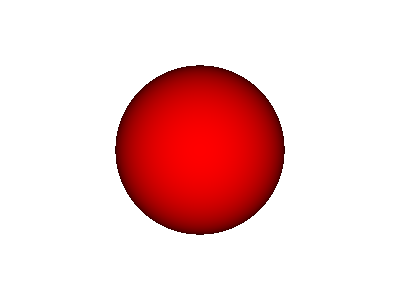

In [11]:
import vtk
from IPython.display import Image
def vtk_show(renderer, width=400, height=300):
    """
    Takes vtkRenderer instance and returns an IPython Image with the rendering.
    """
    renderWindow = vtk.vtkRenderWindow()
    renderWindow.SetOffScreenRendering(1)
    renderWindow.AddRenderer(renderer)
    renderWindow.SetSize(width, height)
    renderWindow.Render()
     
    windowToImageFilter = vtk.vtkWindowToImageFilter()
    windowToImageFilter.SetInput(renderWindow)
    windowToImageFilter.Update()
     
    writer = vtk.vtkPNGWriter()
    writer.SetWriteToMemory(1)
    writer.SetInputConnection(windowToImageFilter.GetOutputPort())
    writer.Write()
    data =  bytes(memoryview(writer.GetResult()))
    #str(cache( -->  bytes(memoryview(
    
    return Image(data)


VtkSourceSphere = vtk.vtkSphereSource()
VtkSourceSphere.SetCenter(0.0, 0.0, 0.0)
VtkSourceSphere.SetRadius(10.0)
VtkSourceSphere.SetPhiResolution(360)
VtkSourceSphere.SetThetaResolution(360)

VtkMapperSphere = vtk.vtkPolyDataMapper()
VtkMapperSphere.SetInputConnection(VtkSourceSphere.GetOutputPort())

VtkActorSphere = vtk.vtkActor()
VtkActorSphere.SetMapper(VtkMapperSphere)
VtkActorSphere.GetProperty().SetColor(1.0, 0.0, 0.0)

VtkRenderer = vtk.vtkRenderer()
VtkRenderer.SetBackground(1.0, 1.0, 1.0)
VtkRenderer.AddActor(VtkActorSphere)

vtk_show(VtkRenderer)